<a href="https://colab.research.google.com/github/PSourabh97/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective of our Project-**

**The main objective of this project is to select the best components which decide the price of mobile and apply different different classification models and check their performance to predict the price .**

In the competitive mobile phone market companies want 
to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

Data Description - 


Battery_power - Total energy a battery can store in one time measured in mAh 

Blue - Has bluetooth or not 


Clock_speed - speed at which microprocessor executes instructions 

Dual_sim - Has dual sim support or not 


Fc - Front Camera mega pixels 


Four_g - Has 4G or not 


Int_memory - Internal Memory in Gigabytes 


M_dep - Mobile Depth in cm 


Mobile_wt - Weight of mobile phone 


N_cores - Number of cores of processor 


Pc - Primary Camera mega pixels 


Px_height - Pixel Resolution Height 


Px_width - Pixel Resolution Width 


Ram - Random Access Memory in Mega Bytes 


Sc_h - Screen Height of mobile in cm 


Sc_w - Screen Width of mobile in cm 


Talk_time - longest time that a single battery charge will last when you are 


Three_g - Has 3G or not 


Touch_screen - Has touch screen or not 


Wifi - Has wifi or not 


Price_range - This is the target variable with value of 0(low cost), 1(medium),cost), 2(high cost) and 3(very high cost).

# **Starting our project with importing the dataset-**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999

In [ ]:
# Printing the dataframe-

df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mobile Price Range Prediction - SOURABH PRAMANIK/data_mobile_price_range.csv', encoding= 'unicode_escape')

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Shape of our dataset-
df.shape

(2000, 21)

In [ ]:
# Checking all the datatypes and null values-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**No null value present in our dataset.**

### **Checking the price ranges count by using countplot-**

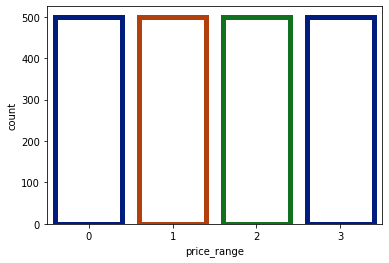

In [ ]:
ax = sns.countplot(x="price_range", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

**Count of mobiles for each price range is same.**

### **Let's check the outliers by using Boxplot -**

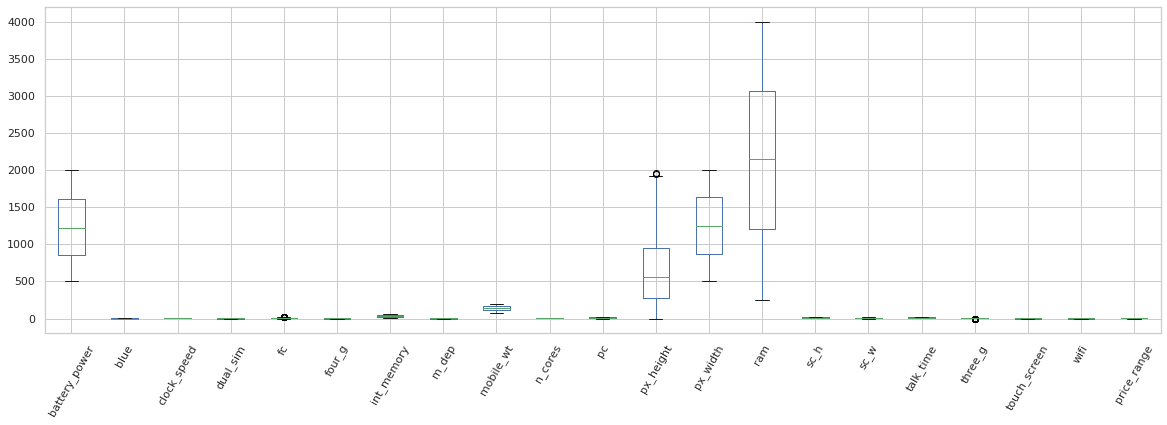

In [ ]:
sns.set_theme(style="whitegrid")
df.plot(kind='box',figsize=(20,6))
plt.xticks(rotation=60)
plt.show()

**No outliers present in our dataset.**

### **Let's check the statistical distribution-**

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### **Checking the distribution of the numerical columns -**

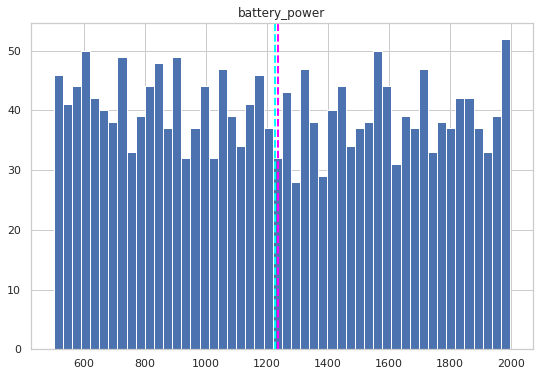

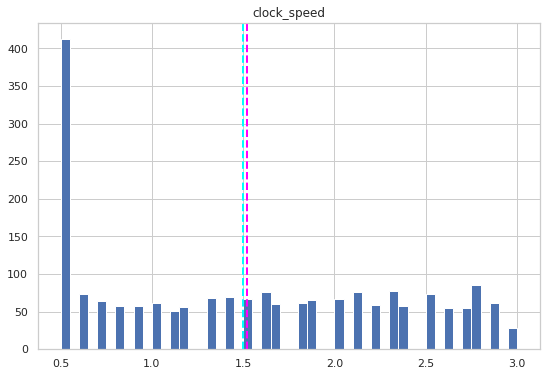

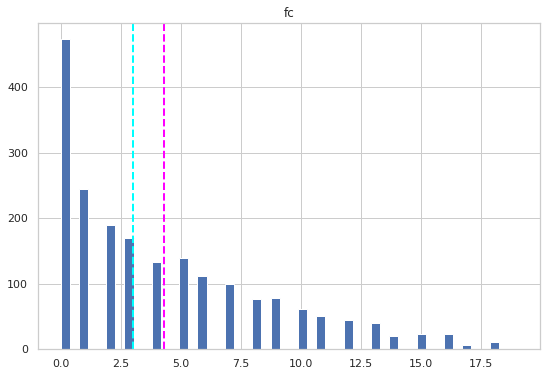

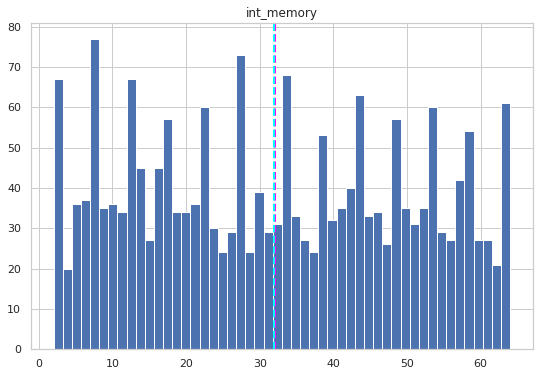

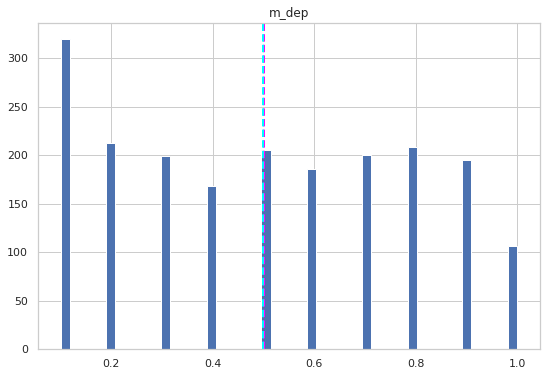

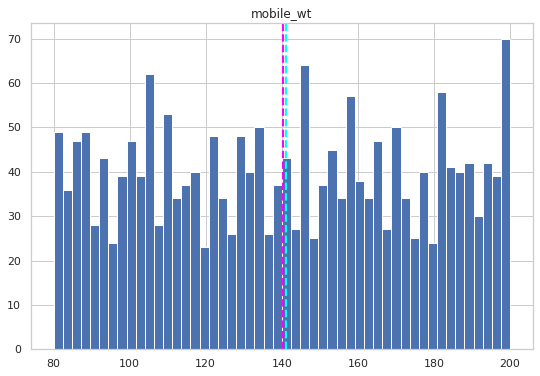

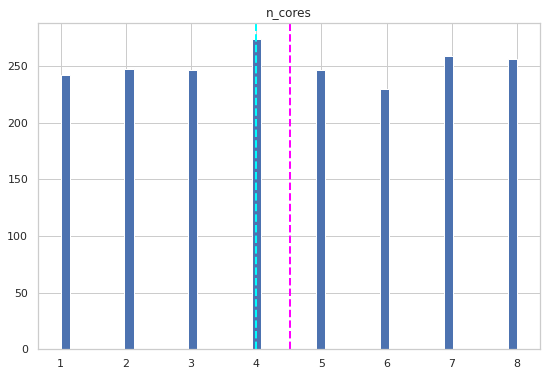

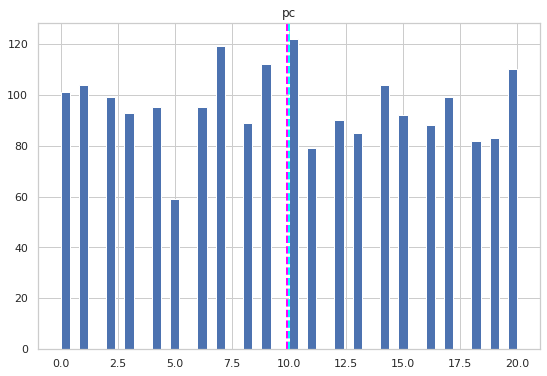

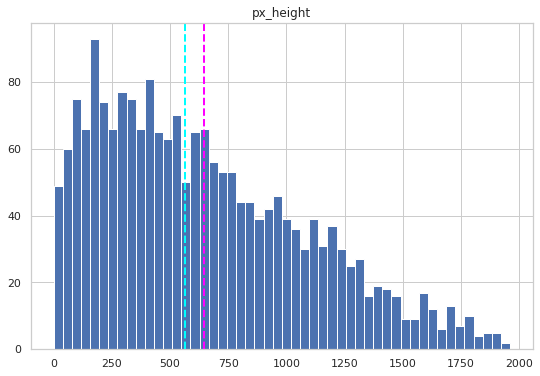

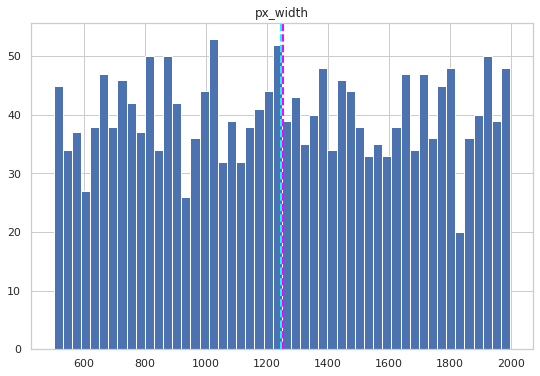

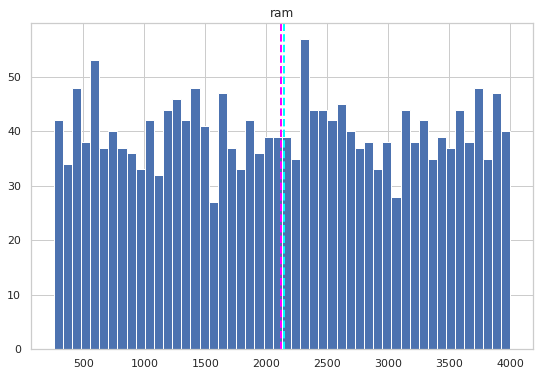

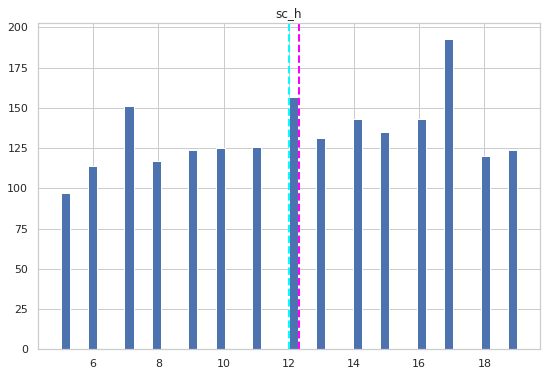

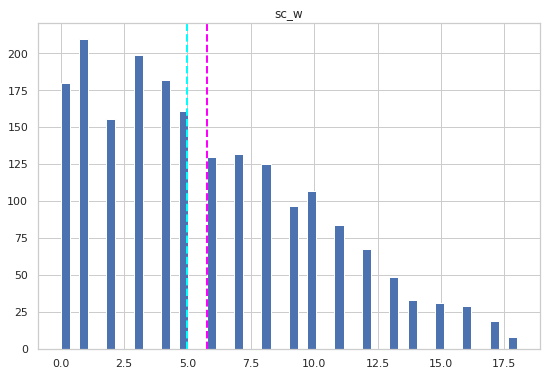

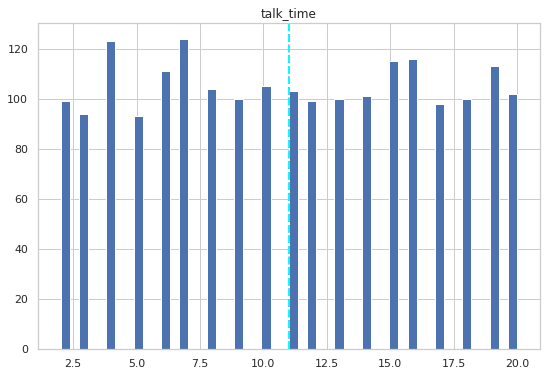

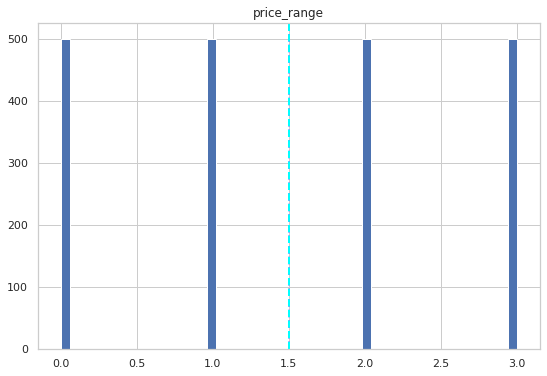

In [ ]:
Check_distribution = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width'
                        ,'ram','sc_h','sc_w','talk_time','price_range']
for col in Check_distribution:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

### **Checking the correalation between the variables -**

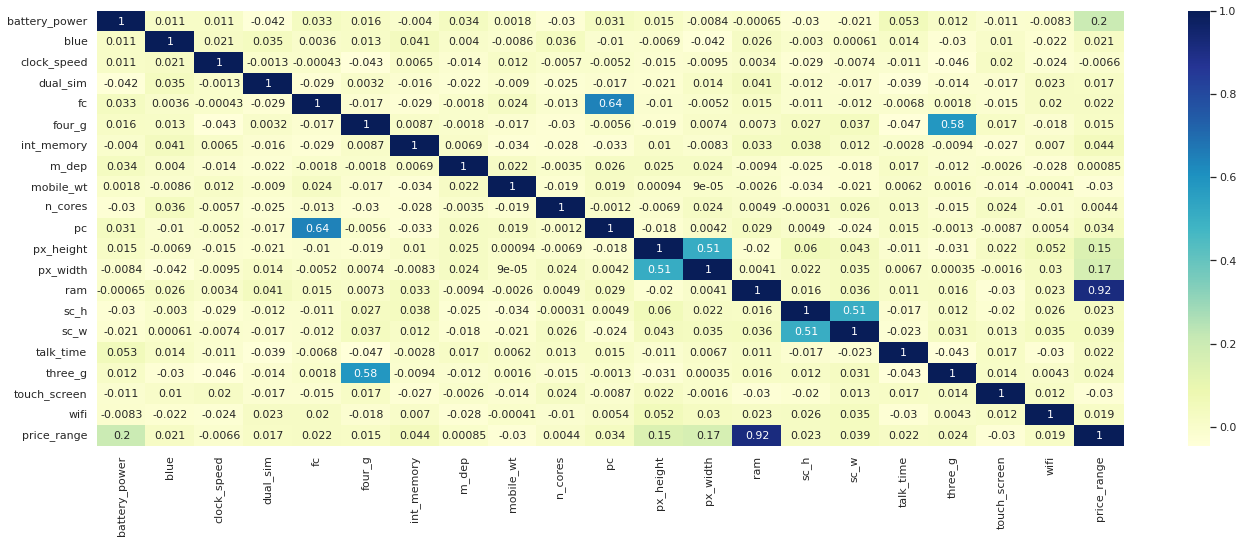

In [ ]:
corr= df.corr()
plt.figure(figsize=(23,8))
sns.heatmap(corr, annot=True, annot_kws={'size':11}, cmap="YlGnBu")
plt.show()

**Here some variables which are very less correlated with taget and other variables.We can drop those variables during test and train split.As we can see that there is a very strong relationship between 'Price range' and 'ram'. Let's understand the relationship by using some visualization.**

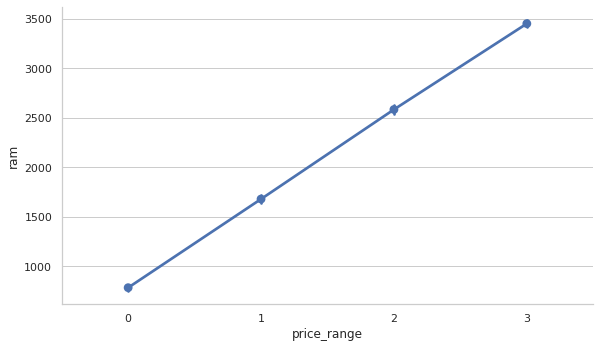

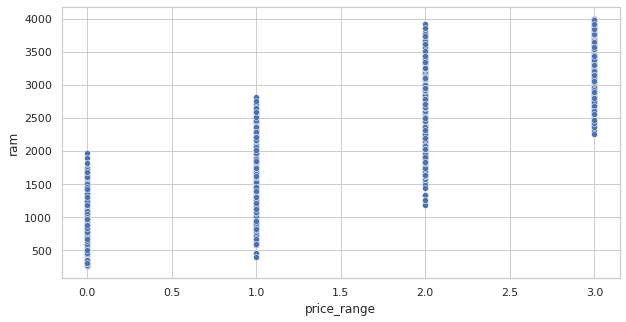

In [ ]:
sns.catplot(data=df,x='price_range',y='ram', kind='point',height=5, aspect=1.7)
plt.show()
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="price_range", y="ram")
plt.show()


In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# **Splitting the dataset into Testing and Training dataset -**

In [ ]:
from sklearn.model_selection import train_test_split

# Independent variables-

X = df.drop(['price_range','mobile_wt','clock_speed'],axis=1) 
 
# Dependent Variable-

y = df['price_range']       

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=30)

# **Scaling -**

**Before applying any algorithm we will do the scaling operation on our independent variables -**

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [ ]:
X_train

array([[-1.04073226,  1.03341513,  0.96352201, ...,  0.55094299,
         0.97600215, -1.04232344],
       [ 0.18326303, -0.96766534, -1.03785902, ...,  0.55094299,
         0.97600215,  0.9593951 ],
       [ 0.8147803 ,  1.03341513,  0.96352201, ...,  0.55094299,
        -1.02458791, -1.04232344],
       ...,
       [-1.15785001, -0.96766534,  0.96352201, ...,  0.55094299,
        -1.02458791, -1.04232344],
       [-0.15890451, -0.96766534,  0.96352201, ...,  0.55094299,
         0.97600215, -1.04232344],
       [-0.4184007 , -0.96766534,  0.96352201, ...,  0.55094299,
        -1.02458791, -1.04232344]])

# **Now we will implement 5 different models on our dataset and will check the performance:**

1. **Logistic Regression**
2. **Random Forest**
3. **XGBoost**
4. **KNN**
5. **SVM**

# **1. Applying Logistic Regression Algorithm -**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

### **Applying GridSearchCV -**

In [ ]:
# We will do hyperparameter tuning to get best parameters-

from sklearn.model_selection import GridSearchCV

param_dict_lr = {'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6]}

lr_grid = GridSearchCV(estimator=lr, param_grid = param_dict_lr , cv = 5, verbose=2, scoring='roc_auc_ovr')

lr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 0.001, 10000.0, 100000.0, 1000000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc_ovr', verbose=2)

In [ ]:
# Let's check the test and training score 

print('Train score : ', lr_grid.best_estimator_.score(X_train,y_train))
print('Test score  : ', lr_grid.best_estimator_.score(X_test,y_test))

Train score :  0.9728571428571429
Test score  :  0.935


**Testing and training score almost same so not overfitting.**


In [ ]:
# Best parameters -

lr_grid.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Printing ROC-AUC Score and Classification Report -

In [ ]:
# Printing ROC-AUC SCORE -

lr_y_pred_proba = lr_grid.predict_proba(X_test)

print('ROC-AUC score : ', roc_auc_score(y_test,lr_y_pred_proba,multi_class="ovr"))

ROC-AUC score :  0.9959478127910372


In [ ]:
# Printing the classification report for training and testing data-

lr_y_train_pred = lr_grid.predict(X_train)
lr_y_test_pred = lr_grid.predict(X_test)

print(classification_report(y_train,lr_y_train_pred))
print("\n")
print(classification_report(y_test,lr_y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       361
           1       0.98      0.97      0.97       346
           2       0.95      0.96      0.96       360
           3       0.97      0.97      0.97       333

    accuracy                           0.97      1400
   macro avg       0.97      0.97      0.97      1400
weighted avg       0.97      0.97      0.97      1400



              precision    recall  f1-score   support

           0       0.91      1.00      0.95       139
           1       0.95      0.90      0.92       154
           2       0.89      0.94      0.91       140
           3       1.00      0.90      0.95       167

    accuracy                           0.94       600
   macro avg       0.93      0.94      0.93       600
weighted avg       0.94      0.94      0.94       600



**Good AUC-ROC Score and classification report is also good.**

### **Confusion Matrix -**

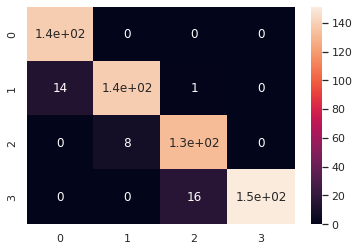

In [ ]:
cm_lr = confusion_matrix(y_test, lr_y_test_pred)
sns.heatmap(cm_lr,annot=True)
plt.show()

# **2. Applying Random Forest-**

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier()

param_dict_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }

### **Applying GridSearchCV-**

In [ ]:
rf_grid = GridSearchCV(estimator=rf,
                       param_grid = param_dict_rf,
                       cv = 5, verbose=2, scoring='roc_auc_ovr')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   46.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

## Printing ROC-AUC Score and Classification Report -

In [ ]:
# Printing ROC-AUC SCORE -

rf_y_pred_proba = rf_grid.predict_proba(X_test)

print('ROC-AUC score : ', roc_auc_score(y_test,rf_y_pred_proba,multi_class="ovr"))

ROC-AUC score :  0.9599435350025458


In [ ]:
# Printing the classification report for train and test

rf_y_train_pred = rf_grid.predict(X_train)
rf_y_test_pred = rf_grid.predict(X_test)

print(classification_report(y_train,rf_y_train_pred))
print("\n")
print(classification_report(y_test,rf_y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       361
           1       0.84      0.79      0.81       346
           2       0.86      0.82      0.84       360
           3       0.94      0.96      0.95       333

    accuracy                           0.89      1400
   macro avg       0.88      0.89      0.88      1400
weighted avg       0.88      0.89      0.88      1400



              precision    recall  f1-score   support

           0       0.81      0.99      0.89       139
           1       0.78      0.70      0.74       154
           2       0.73      0.69      0.71       140
           3       0.90      0.87      0.88       167

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.80       600
weighted avg       0.81      0.81      0.81       600



### **Confusion Matrix-**

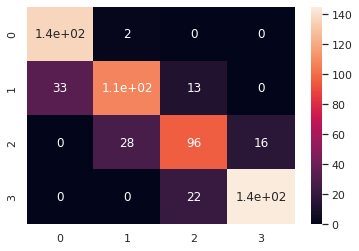

In [ ]:
cm_rf = confusion_matrix(y_test, rf_y_test_pred)
sns.heatmap(cm_rf,annot=True)
plt.show()

# **Applying XGBoost -**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective= 'multi:softmax', nthread=4, seed=42)


### **Applying GridSearchCV -**

In [ ]:
param_dict_xgb = {
    'max_depth': range (2, 10, 1), 'n_estimators': range(60, 100, 40), 'learning_rate': [0.1, 0.05, 0.01] }

xgb_grid = GridSearchCV(estimator=xgb,  param_grid = param_dict_xgb,
                        cv = 5, verbose=2, scoring='roc_auc_ovr')

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   0.9s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=60 .................
[CV] .. learning_rate=0.1, max_depth=3, n_estimators=60, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=60 .................
[CV] .. learning_rate=0.1, max_depth=3, n_estimators=60, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=60 .................
[CV] .. learning_rate=0.1, max_depth=3, n_estimators=60, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=60 .................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='multi:softmax',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 100, 40)},
         

In [ ]:
print('Train score  : ', xgb_grid.best_estimator_.score(X_train,y_train))
print('Test score  : ', xgb_grid.best_estimator_.score(X_test,y_test))

Train score  :  1.0
Test score  :  0.8966666666666666


**Testing and training score is almost same so no overfitting.**

In [ ]:
# Best Parameters-

xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=60, n_jobs=1,
              nthread=4, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

## Printing ROC-AUC Score and Classification Report -


In [ ]:
# Printing ROC-AUC SCORE -

xgb_y_pred_proba = xgb_grid.predict_proba(X_test)

print('ROC-AUC score : ', roc_auc_score(y_test,xgb_y_pred_proba,multi_class="ovr"))

ROC-AUC score :  0.9869522570860334


In [ ]:
# Printing the classification report for train and test

xgb_y_train_pred = xgb_grid.predict(X_train)
xgb_y_test_pred = xgb_grid.predict(X_test)


print(classification_report(y_train,xgb_y_train_pred))
print("\n")
print(classification_report(y_test,xgb_y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       361
           1       1.00      1.00      1.00       346
           2       1.00      1.00      1.00       360
           3       1.00      1.00      1.00       333

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



              precision    recall  f1-score   support

           0       0.91      0.99      0.94       139
           1       0.90      0.90      0.90       154
           2       0.82      0.86      0.84       140
           3       0.96      0.84      0.90       167

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



### **Confusion Matrix-**

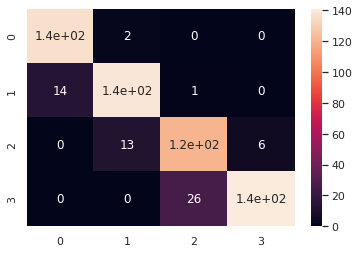

In [ ]:
cm_xgb = confusion_matrix(y_test, xgb_y_test_pred)
sns.heatmap(cm_xgb,annot=True)
plt.show()

# **Applying KNN algorithm-**

### Let's try to find the best K value -

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Setup arrays to store training and test accuracies
neighbors = np.arange(1,60)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

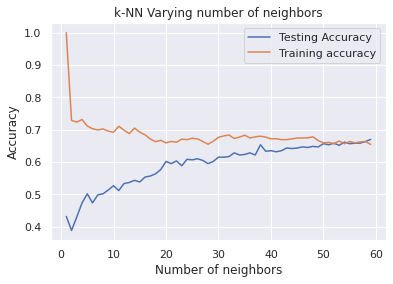

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

**After K=50 Testing accuracy decreasing. So we will take K=50.**

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors= 50)

# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

## Printing ROC-AUC Score and Classification Report -

In [ ]:
# Printing ROC-AUC SCORE -

knn_y_pred_proba = knn.predict_proba(X_test)

print('ROC-AUC score : ', roc_auc_score(y_test,knn_y_pred_proba,multi_class="ovr"))


ROC-AUC score :  0.8500126005892444


In [ ]:
# Print the classification report for train and test

knn_y_train_pred = knn.predict(X_train)
knn_y_test_pred = knn.predict(X_test)

print(classification_report(y_train,knn_y_train_pred))
print("\n")
print(classification_report(y_test,knn_y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       361
           1       0.55      0.47      0.51       346
           2       0.55      0.64      0.59       360
           3       0.81      0.65      0.72       333

    accuracy                           0.66      1400
   macro avg       0.67      0.66      0.66      1400
weighted avg       0.66      0.66      0.66      1400



              precision    recall  f1-score   support

           0       0.69      0.94      0.79       139
           1       0.59      0.45      0.51       154
           2       0.53      0.66      0.58       140
           3       0.87      0.61      0.72       167

    accuracy                           0.66       600
   macro avg       0.67      0.66      0.65       600
weighted avg       0.68      0.66      0.65       600



### **Confusion Matrix -**

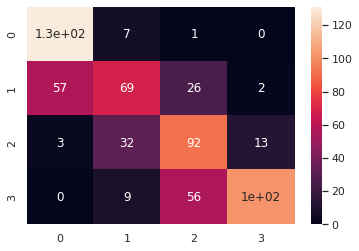

In [ ]:
cm_knn = confusion_matrix(y_test, knn_y_test_pred)
sns.heatmap(cm_knn,annot=True)
plt.show()

# **Applying SVM Algorithm -**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

### **Applying GridSearchCV-**

In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
svm_model = GridSearchCV(SVC(probability=True), params_grid, cv=5 )
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Best Parameters-

svm_model.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print('Training score : ', svm_model.best_estimator_.score(X_train,y_train))
print('Test score     : ', svm_model.best_estimator_.score(X_test,y_test))

Training score :  0.9778571428571429
Test score     :  0.9266666666666666


**Testing and training score is almost same.**

### **Printing AUC-ROC score and classification Report-**

In [ ]:
# Printing ROC-AUC SCORE -

svm_y_pred_proba = svm_model.predict_proba(X_test)

print('ROC-AUC score : ', roc_auc_score(y_test,svm_y_pred_proba,multi_class="ovr"))

ROC-AUC score :  0.9953712718512516


**Classification Report-**

In [ ]:
# Classification Report of Train and Test data-

svm_y_train_pred = svm_model.predict(X_train)
svm_y_test_pred = svm_model.predict(X_test)

print(classification_report(y_train,svm_y_train_pred))
print("\n")
print(classification_report(y_test,svm_y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       361
           1       0.98      0.97      0.98       346
           2       0.97      0.96      0.97       360
           3       0.98      0.98      0.98       333

    accuracy                           0.98      1400
   macro avg       0.98      0.98      0.98      1400
weighted avg       0.98      0.98      0.98      1400



              precision    recall  f1-score   support

           0       0.91      1.00      0.96       139
           1       0.94      0.91      0.92       154
           2       0.87      0.91      0.89       140
           3       0.98      0.89      0.93       167

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



### **Confusion Matrix-**

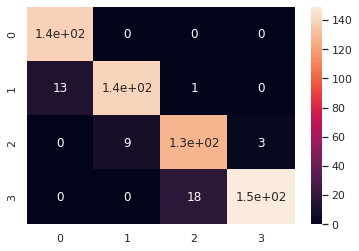

In [ ]:
cm_svm = confusion_matrix(y_test, svm_y_test_pred)
sns.heatmap(cm_svm,annot=True)
plt.show()

# **Let's compare all the model with respect to ROC-AUC Score-**



1.   **AUC-ROC Score For Logistic Regression -** 0.9959478127910372

1.   **AUC-ROC Score For Random Forest -** 0.9599435350025458

1.   **AUC-ROC Score For XGBoost -** 0.9869522570860334
2.   **AUC-ROC Score For KNN -** 0.8500126005892444

2.   **AUC-ROC Score For SVM -** 0.9953712718512516




# **Conclusion -**



*   As we can see here that except K Nearest Neighbour all the other models
performing so well with respect to AUC_ROC Score and Classification Report . So if we want to do some prediction with this dataset then we can use these Models.
*   This work can be concluded with the comparable results of
both Feature selection algorithms and classifier because we selected some relevent and important features to do the calculation.



# **Outcome of our work-**



*   Cost prediction is the very important factor of marketing
and business. To predict the cost same procedure can be
performed for all types of products for example Cars,
Foods, Medicine, Laptops etc.
*   Best marketing strategy is to find optimal product (with
minimum cost and maximum specifications). So products
can be compared in terms of their specifications, cost,
manufacturing company etc.

*   By specifying economic range a good product can be
suggested to a costumer.





x